# **Hotel Booking Demand**

By:  Cai Du Yi, Li Zihan, Zhang Jing Wen

---


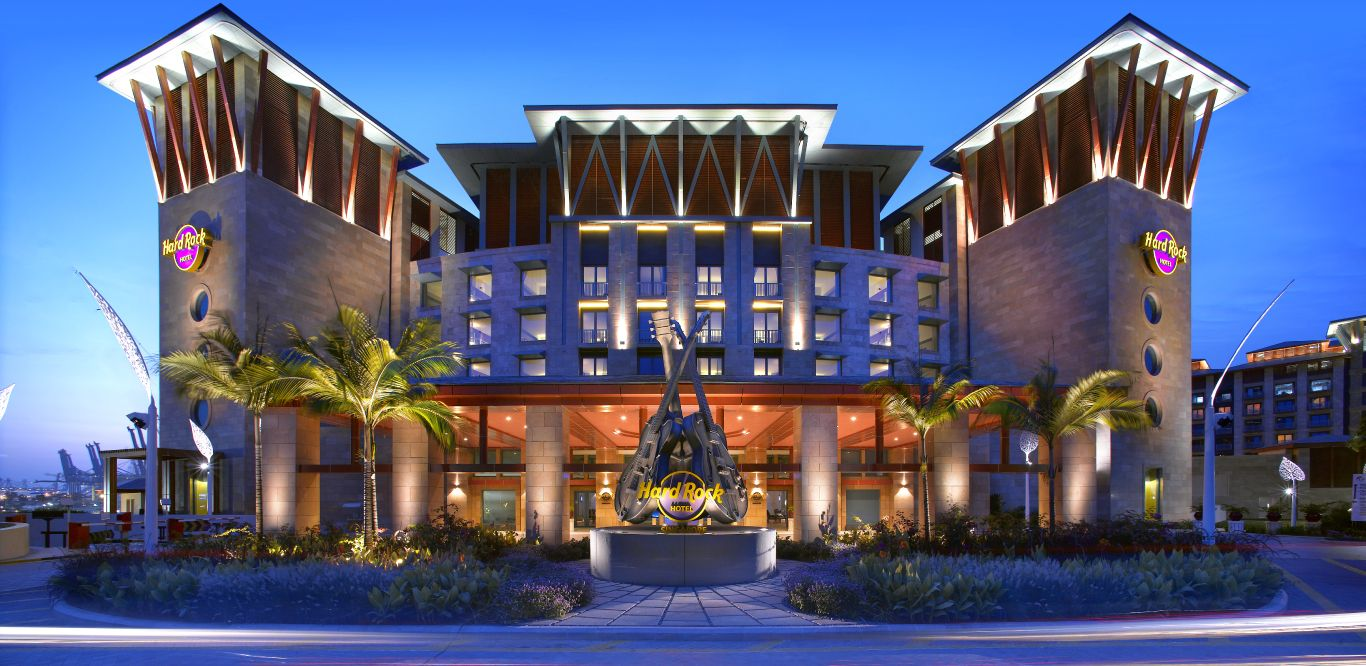

## Let's look at Hotel Booking!

Studies show that the average percentage of canceled reservations is 24% . This implies that "when Hotels calculate their future revenue from existing reservations, they have to reduce it by 24%". (Loeb, 2016)

With Covid restrictions loosening and borders opening, Hotels around the world are seeing a surge in reservations. In order to properly estimate revenue, manpower requirements, and food indents, it is important to be able to to predict the number of reservations that will be cancelled.


### Problem: Predict whether a reservation will be cancelled based on [Variables to be Determined].
---
    
<p><p>Before diving into our analysis though, let's become familiar with the datasets that we will be handling in this project:<br><br></p>

<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/hotel_bookings.csv</b></div>
<ul>
    <li><b>ADR:</b> Average Daily Rate as defined by the sum of all lodging transactions by the total number of staying nights. </li>
    <li><b>Adults:</b> Number of adults.</li>
    <li><b>Agent:</b> ID of the travel agency that made the booking.</li>
    <li><b>ArrivalDateDayOfMonth:</b> Day of the month of the arrival date.</li>
    <li><b>ArrivalDateMonth:</b> Month of arrival date with 12 categories: “January” to “December”.</li>
    <li><b>ArrivalDateWeekNumber:</b> Week number of the arrival date</li>
    <li><b>ArrivalDateYear:</b> Year of arrival date.</li>
    <li><b>AssignedRoomType:</b> Code for the type of room assigned to the booking.</li>
    <li><b>Babies:</b> Number of babies.</li>
    <li><b>BookingChanges:</b> Number of changes/amendments made to the booking from the moment the booking was entered.</li>
    <li><b>Children:</b> Number of children.</li>
    <li><b>Company:</b> ID of the company/entity that made the booking.</li>
    <li><b>Country:</b> Country of origin.</li>
    <li><b>CustomerType:</b> Type of booking, assuming one of <b><i>four</i></b> categories.</li>
    <li><b>DaysInWaitingList:</b> Number of days the booking was in the waiting list before it was confirmed.</li>
    <li><b>DepositType:</b> Indication on if the customer made a deposit to guarantee the booking.</li>
    <li><b>DistributionChannel:</b> Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.</li>
    <li><b>IsCanceled:</b> Value indicating if the <b><i>booking was canceled (1) or not (0)</i></b>.</li>
    <li><b>IsRepeatedGuest:</b> Value indicating if the booking name was from a repeated guest (1) or not (0).</li>
    <li><b>LeadTime:</b> Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.</li>
    <li><b>MarketSegment:</b> Market segment designation.</li>
    <li><b>Meal:</b> Type of meal booked.</li>
    <li><b>PreviousBookingsNotCanceled:</b> Number of previous bookings not cancelled.</li>
    <li><b>PreviousCancellations:</b> Number of previous bookings that were cancelled by the customer.</li>
    <li><b>RequiredCardParkingSpaces:</b> Number of car parking spaces required by the customer.</li>
    <li><b>ReservationStatus:</b> Reservation last status, assuming one of <b><i>three</i></b> categories.</li>
    <li><b>ReservationStatusDate:</b> Date at which the last status was set.</li>
    <li><b>ReservedRoomType:</b> Code of room type reserved.</li>
    <li><b>StaysInWeekendNights:</b> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.</li>
    <li><b>StaysInWeekNights:</b> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.</li>
    <li><b>TotalOfSpecialRequests:</b> Number of special requests made by the customer.</li>

</ul>
    </div>
    
<p><b>Full description</b> of the dataset can be found in <a href="https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=FA4DF3FBFE44ED1ACB88E69DCB548E9E412FFC80309B87B7192C922858831FE9F95F5A9BEBC3E0878955AF4845C2D991&originRegion=eu-west-1&originCreation=20220321081241 ">this article</a>.</p>
<p>From here on out, we will be performing Data Cleaning, Exploratory Data Analysis and Machine Learning to predict the cancellation rate.</p>
<p><em><strong>

In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

In [ ]:
# Reading in the csv data into the hotel_df dataframe
path = "hotel_bookings.csv"
hotel_df = pd.read_csv(path)
hotel_df.head()

# **Data Cleaning**
---

### **What is Data Cleaning?**
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Our dataset has to be cleaned properly before we can perform exploratory data analysis (EDA) to draw meaningful insights.



### **What Needs to be Cleaned?**
In this dataset, there are **6** things needed to be done in order to clean the data. 

1. Drop rows where Country has **NaN**.


2. Convert company, agent and children that is NaN to 0.


3. Remove outliers for ADR (ADR > 5000 and ADR == 0).


4. Concate babies and children columns to `hasKids` column.


5. Create new column called `date_of_arrival` and `arrival_day_of_week`.


6. Create columns `useAgent` and `useCompany`. 


7. Create new column called `total_nights`.


In [ ]:
# Getting general information on the dataset
hotel_df.info()

In [ ]:
# Getting basic statistics on numeric data
hotel_df.describe()

In [ ]:
# Getting the unqiue values in each column of the dataset
print("Unique Values in Each Column\n")
for var in hotel_df:
    print("Number of Levels in " + var + ":", len(hotel_df[var].unique()))
    print("No. of values in " + var + ":\n", (hotel_df[var].value_counts()))
    print("===============================================================")
    print("\n")

### Handling Missing Data
---
This sub-section deals with missing values in the data set. Here we utilise `heatmaps` to give us a visual overview of the **missing data**. The yellow regions represents data where there is missing values, while the purple regions represents filled data.

In this sub-section we have done the following:

- Removed all rows where country is **NaN**, as these rows will not be able to provide any valuable insights later on in the EDA.


- Constructed an assumption and replaced all **NaN** values in the `children`, `agent` and `company` column.

In [ ]:
# A graphical overview on the data that is missing
plt.figure(figsize = (20,10))
sb.heatmap(hotel_df.isna(), cbar = False, annot = None, yticklabels = False, cmap = 'viridis')
plt.title("Heatmap of Missing Data", fontsize=15)
plt.show()

# Yellow: NaN
# Purple: Have data

In [ ]:
# Check the number of Na values in all the columns
hotel_df.isna().sum()

In [ ]:
# Drop the rows with no country values
# This is to remove rows where the country data is missing
hotel_df.drop(hotel_df[hotel_df['country'].isna()].index, axis = 0, inplace = True)

In [ ]:
# Check the number of Na values in all the columns after Na country were dropped
hotel_df.isna().sum()

# children, agent and company still contains missing data

In [ ]:
# Here we are going to make 3 assumptions for the 3 columns that contains Na values
# children: If value is Na, assume that means no children. Hence value is 0.
# agent: If value is Na, assume that means customer did not book through agent. hence agent value (Id of agent) is 0.
# company: If value is Na, assume that customner did not have any company book for them. Hence company value is (Id of company) 0.
hotel_df.fillna(0, inplace = True)

In [ ]:
# A graphical overview on the data that is missing, after handling of Na values is carried out
plt.figure(figsize = (20,10))
sb.heatmap(hotel_df.isna(), cbar = False, annot = None, yticklabels = False, cmap = 'viridis')
plt.title("Heatmap of Missing Data", fontsize=15)
plt.show()

# Yellow: NaN
# Purple: Have data

### Formatting Data
---

This section deals with reformatting data into forms that we prefer to handle. 

In this sub-section, we have done the following:

- Created `hasKids` column: Represents whether the customer has kids. This is derived from combination  of the `children` and `babies` column.


- Created `useAgent` column: Represents whether the customer made the booking via an agent. This is derived from the `agent` column contains the id of agent used, which is not really relevant to us.


- Created `useCompany` column: Represents whether the customer made the booking via a company. This is derived from the `company` column contains the id of company used, which is once again, not really relevant to us.


- Created `arrival_day_of_week` column: Tells us the day of week the customer arrived.


- Created `total_nights` column: Tells us the duration of stay.

In [ ]:
# Creating a function to check if 2 columns contains 0
# This is a utility function that allows us to convert large numeric data into categorical ones
def twoColumnConverter(cluster):
    if (0 == cluster[0]) and (0 == cluster[1]):
        return 0
    else:
        return 1

# Creating a function to check if a columns contains 0
# This is a utility function that allows us to convert large numeric data into categorical ones
def oneColumnConverter(cluster):
    if cluster == 0:
        return 0
    else:
        return 1

In [ ]:
# Creating a new column called "isfamily", if customer has children or babies, we will classify them as a family
hotel_df['hasKids'] = hotel_df[['children', 'babies']].apply(twoColumnConverter, axis = 1)
# Check for the result
hotel_df['hasKids'].value_counts()

In [ ]:
# Import time series libraries
from time import strptime
import calendar
import datetime

In [ ]:
# Creating date of arrival column
temp_df = pd.DataFrame({'year': hotel_df["arrival_date_year"],
                   'month': [datetime.datetime.strptime(MONTH[:3], "%b").month for MONTH in hotel_df["arrival_date_month"]],
                   'day': hotel_df["arrival_date_day_of_month"]})

hotel_df['date_of_arrival'] = pd.to_datetime(temp_df[["year", "month", "day"]])

# Creating day of week arrival column
hotel_df['arrival_day_of_week'] = hotel_df['date_of_arrival'].apply(lambda x: calendar.day_name[x.weekday()])

In [ ]:
# Creating 2 new columns
# useAgent: represents if the customer books the hotel room through an agent
# useCompany: represents if the customer books the hotel room through a company
hotel_df['useAgent'] = hotel_df['agent'].apply(oneColumnConverter)
hotel_df['useCompany'] = hotel_df['company'].apply(oneColumnConverter)

# Creating a new column total_nights for duration of the stay
hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

### Handling Outliers
---
This section deals with the extreme outliers within the data set. 

We utilised `boxplot` and `histogram` to provide a visual representation of the outliers that exists. As seen below, the data is extremely right skewed due to a few outliers at the extreme right.

In this sub-section, we have done the following:

- Removed outliers in `adr` column, this includes values where adr > 5000 as the it is an extreme outlier which does not accurately represent the dataset, and adr == 0, as it does not make much sense that the price of the hotel room is equals to 0.

In [ ]:
# Visualising the ADR data
f, axes = plt.subplots(2, 1, figsize=(18, 10))

fig = sb.boxplot(data = hotel_df['adr'], orient = "h", ax = axes[0])
fig.set_title("Boxplot and Histogram of Adr", fontsize=15)
sb.histplot(data = hotel_df['adr'], ax = axes[1])
plt.show()

In [ ]:
# Drop rows where ADR > 5000 and ADR == 0
# Drop ADR > 5000 as the it is an extreme outlier which does not accurately represent the dataset
# Drop ADR == 0, as it does not make much sense that the price of the hotel room is equals to 0
hotel_df.drop(hotel_df.index[(hotel_df["adr"] > 2000) | (hotel_df["adr"] <= 0)] ,axis = 0, inplace = True)
hotel_df.reset_index(inplace=True)

In [ ]:
# Visualising the ADR data after outliers have been dropped
f, axes = plt.subplots(2, 1, figsize=(18, 10))

fig = sb.boxplot(data = hotel_df['adr'], orient = "h", ax = axes[0])
fig.set_title("Boxplot and Histogram of Adr", fontsize=15)
sb.histplot(data = hotel_df['adr'], ax = axes[1])
plt.show()

In [ ]:
# Data after it has been cleaned
hotel_df.info()

# **Exploratory Data Analysis** (EDA)
---
### **What is Exploratory Data Analysis?**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.



### **What are we Exploring?**
In this project, we performed EDA on **24** different variables:

1. Cancellation by Number of Adults
2. Cancellation by hasKids
3. Cancellation by Meal
4. Cancellation by Country 
5. Cancellation by Market Segment
6. Cancellation by Repeated Guest
7. Cancellation by Number of Previous Cancellations
8. Cancellation by has Previous Cancellations
9. Cancellation by Room Type
10. Cancellation by Deposit Type
11. Cancellation by useAgent
12. Cancellation by useCompany
13. Cancellation by Days in Waiting List
14. Cancellation by Customer Type
15. Cancellation by ADR
16. Cancellation by Month and Day of Month
17. Cancellation by Months
18. Cancellation by Total Nights Stayed
19. Cancellation by Lead Time
20. Cancellation by Arrival Day of Week
21. Cancellation by Booking Changes
22. Cancellation by Total Special Request
23. Cancellation by Stays in Week Nights
24. Cancellation by Stays in Weekend Nights

In [ ]:
# Countplot of is_canceled
fig = px.histogram(hotel_df, x='is_canceled', color = "is_canceled", barmode='group',width = 1000, height = 500,
                  title = "Countplot on Number of Cancellation")
fig.show()

#### Remarks: The data is relatively well proportioned. Hence no balancing required.
---

### 1 - Cancellation by Number of Adults 

In [ ]:
plt.figure(figsize = (20,5))

# Getting percentage of cancellation by number of adults
temp_df1 = hotel_df.groupby(['is_canceled', 'adults']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
# Plotting heatmap of the cancellation rate by number of adults
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by No. of Adults", fontsize=15)
plt.show()
del temp_df1

#### Conclusion: There is no clear correlation between adults and cancellation rate.
----


### 2 - Cancellation by hasKids

In [ ]:
plt.figure(figsize = (10,5))

# Getting percentage of cancellation by whether customer has kids
temp_df6 = hotel_df.groupby(['is_canceled', 'hasKids']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by whether customer has kids
sb.heatmap(temp_df6.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Percentange of Cancellation by hasKids", fontsize=15)
plt.show()
del temp_df6

#### Conclusion: No clear correlation between hasKids and cancellation rate.
---

### 3 - Cancellation by Meal

In [ ]:
plt.figure(figsize = (20,5))

# Getting percentage of cancellation by meal types
temp_df1 = hotel_df.groupby(['is_canceled', 'meal']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by meal types
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by Meal Type", fontsize = 15)
plt.show()
del temp_df1

#### Conclusion: No strong correlation between meals and cancellation rate.
---

### 4 - Cancellation by Country 

In [ ]:
# Creating new dataframe; country_df which contains the country and number of visitors
country_df = pd.DataFrame(hotel_df["country"].value_counts()).sort_values(by = ["country"])
country_df.reset_index(inplace = True)
country_df.rename(columns={"country": "no_of_guests","index" : "country"}, inplace= True)

# Plotting the pie chart
fig = px.pie(country_df, values='no_of_guests', names='country', title='Visitors by Country')

# Setting formats
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

#### Conclusion: Guests are not evenly distributed across countries, so correlation by % cancellation for each country will be inaccurate.

In [ ]:
# Creating new dataframe; which contains the country and % of visitors contributed
total_guests = country_df["no_of_guests"].sum()
country_df["%_of_total_guests"] = country_df["no_of_guests"] / total_guests * 100 

# Plotting the choropleth map
guest_map = px.choropleth(country_df,
                    locations = country_df["country"],
                    color = country_df["%_of_total_guests"],
                    hover_name = country_df["country"], 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title="Country by % of Total Guests")

guest_map.show()

#### Conclusion: Heavily concentrated in Portugal (40.22%) and Eastern Europe, since the Hotels are based in Portugal.

In [ ]:
# Creating new dataframe; which contains the country and cancellation rate for each country
country_df2 = hotel_df.groupby(['is_canceled', 'country']).size() #shows country: no. of cancellations (by is_cancelled or not)
country_df2 = pd.DataFrame(country_df2.groupby(level=1).apply(lambda x: x / float(x.sum()) * 100)) #converts into % cancellation
country_df2.reset_index(inplace = True)
country_df2 = country_df2.loc[country_df2["is_canceled"] == 1].drop(columns ='is_canceled') #drop the not is_cancelled
country_df2.rename(columns = {0: 'cancellation_%'},inplace = True) 

# Plotting the choropleth map
guest_map = px.choropleth(country_df2,
                    locations = country_df2["country"],
                    color = country_df2["cancellation_%"],
                    hover_name = country_df2["country"], 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title="% Cancellation of each Country")

guest_map.show()

del country_df2
del country_df
del total_guests

#### Remarks: Previously shown that correlation will not be accurate, this is just for visualization.
---

### 5 - Cancellation by Market Segment

In [ ]:
plt.figure(figsize = (20,5))

# Getting percentage of cancellation by market_segment
temp_df1 = hotel_df.groupby(['is_canceled', 'market_segment']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by market_segment
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by Market Segment", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df1 = temp_df1.unstack().melt()
temp_df1["cancel"] = np.resize([0,1], 16)
temp_df1["cancel"] = temp_df1["cancel"].astype(str) # The percentage is for cancel or not cancel
temp_df1["annot"] = round(temp_df1["value"],2).astype(str) + "%" # For annotation

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df1, x="market_segment", y="value", color="cancel", text="annot", width = 1000, 
             height = 500, title = "Cancellation Rate vs Market Segment",
            labels=dict(value="Proportion of Guest %"))
             
fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 
                                          'categoryarray':['Complementary','Direct','Corporate','Aviation', 'Offline TA/TO', 'Online TA', 'Groups', 'Undefined']})

fig.show()
del temp_df1

#### Conclusion: Complementary and Direct have a lower chance of cancellation.
---

### 6 - Cancellation by Repeated Guest

In [ ]:
plt.figure(figsize = (10,5))

# Getting percentage of cancellation by whether guest is repeated
temp_df1 = hotel_df.groupby(['is_canceled', 'is_repeated_guest']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by whether guest is repeated
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by Is Repeated Guest", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df1 = temp_df1.unstack().melt()
temp_df1["cancel"] = np.resize([0,1], 4)
temp_df1["cancel"] = temp_df1["cancel"].astype(str)
temp_df1["annot"] = round(temp_df1["value"],2).astype(str) + "%"

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df1, x="is_repeated_guest", y="value", color="cancel", text="annot", width = 1000, height = 500,
            title = "Cancellation Rate vs Repeated Guest", labels=dict(value="Proportion of Guest %"))

fig.show()
del temp_df1

#### Conclusion: Repeating guests have a lower rate of cancelling their reservations.
---

### 7 - Cancellation by Number of Previous Cancellations

In [ ]:
plt.figure(figsize = (25,5))

# Getting number of cancellation by number of previous cancellations
sb.heatmap(hotel_df.groupby(['is_canceled', 'previous_cancellations']).size().unstack(),annot = True, fmt = ",.0f", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Cancellation by previous_cancellations", fontsize=15)
plt.show()

#### Remarks: Remove outliers 13 and above.

In [ ]:
plt.figure(figsize = (20,5))

# Getting percentage of cancellation by number of previous cancellations
temp_df1 = hotel_df[hotel_df["previous_cancellations"]<13].groupby(['is_canceled', 'previous_cancellations']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by number of previous cancellations
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by previous_cancellations", fontsize=15)
plt.show()

#### Conclusion: Guests with 1 previous cancellation has highest chance of cancelling again.
---

### 8 - Cancellation by has Previous Cancellations

In [ ]:
# Creating a new dataframe; temp_df1, which has the additional column to check if the guest has previous cancellations
temp_df1 = hotel_df
for row in range(len(temp_df1)):
    if temp_df1["previous_cancellations"][row] > 0:
        temp_df1["previous_cancellations"][row] = 1
        
# Getting percentage of cancellation by presence of previous cancellations
temp_df1 = temp_df1.groupby(['is_canceled', 'previous_cancellations']).size().groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by presence of previous cancellations
plt.figure(figsize = (10,5))
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by has_previous_cancellations", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df1 = temp_df1.unstack().melt()
temp_df1["cancel"] = np.resize([0,1], 4)
temp_df1["cancel"] = temp_df1["cancel"].astype(str)
temp_df1["annot"] = round(temp_df1["value"],2).astype(str) + "%"

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df1, x="previous_cancellations", y="value", color="cancel", text="annot", width = 1000, height = 500, 
             title="Cancellation Rate vs Have Previous Cancellation", labels=dict(value="Proportion of Guest %"))

fig.show()
del temp_df1

#### Conclusion: Guests with previous cancellation have higher chance of cancelling again.
----

### 9- Cancellation by Room Type

In [ ]:
plt.figure(figsize = (20,5))

# Plotting heatmap of the number of cancellation by room type
sb.heatmap(hotel_df.groupby(['is_canceled', 'assigned_room_type']).size().unstack(),annot = True, fmt = ",.0f", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Cancellation by Room Type", fontsize=15)
plt.show()

In [ ]:
# Getting percentage of cancellation by room type
temp_df1 = hotel_df.groupby(['is_canceled', 'assigned_room_type']).size()
temp_df1 = temp_df1.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by room type
plt.figure(figsize = (20,5))
sb.heatmap(temp_df1.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by Room Type", fontsize=15)
plt.show()

del temp_df1

#### Conclusion: There seems to rooms where cancelation rate is higher (e.g room A), while there are other rooms where cancelation rate is much lower (e.g room I).
---

### 10- Cancellation by Deposit Type

In [ ]:
plt.figure(figsize = (12,5))

# Plotting heatmap of the number of cancellation by deposit type
sb.heatmap(hotel_df.groupby(['is_canceled', 'deposit_type']).size().unstack(),annot = True, fmt = ",.0f", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Cancellation by Deposit Type", fontsize=15)
plt.show()

In [ ]:
# Getting percentage of cancellation by deposit type
temp_df2 = hotel_df.groupby(['is_canceled', 'deposit_type']).size()
temp_df2 = temp_df2.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by deposit type
plt.figure(figsize = (12,5))
sb.heatmap(temp_df2.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by Deposit Type", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df2 = temp_df2.unstack().melt()
temp_df2["cancel"] = np.resize([0,1], 6)
temp_df2["cancel"] = temp_df2["cancel"].astype(str)
temp_df2["annot"] = round(temp_df2["value"],2).astype(str) + "%"

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df2, x="deposit_type", y="value", color="cancel", width = 1000, height = 500, text="annot",
            title="Cancellation Rate vs Deposit Type", labels=dict(value="Proportion of Guest %"))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 
                                          'categoryarray':['Refundable','No Deposit','Non Refund']})

fig.show()
del temp_df2

#### Conclusion: Guests who have non-refundable deposit type have a high chance of cancelling their reservations.

In [ ]:
pd.options.display.max_columns = 50
deposit_mean_data = hotel_df.groupby("deposit_type").mean()
deposit_mean_data.iloc[:,1:]

The conclusion we got was very strange, as such we decided to investigae further to find out the reason.


After comparing the mean between the 3 sub-groups: No Deposit, Non Refund and Refundable. We found out that, this could be reasoned by the following factors:


- Guests in Non Refund deposits have almost 2x longer lead_time
- is_repeated_guest in Non Refund is ~ 1/10th
- previous_cancellations is 10x higher
- previous_bookings_not_canceled is 1/15th
- special requests are very rare
---

### 11- Cancellation by useAgent

In [ ]:
plt.figure(figsize = (10,5))

# Plotting heatmap of the number of cancellation by those who used agents
sb.heatmap(hotel_df.groupby(['is_canceled', 'useAgent']).size().unstack(),annot = True, fmt = ",.0f", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Cancellation using Agent", fontsize=15)
plt.show()

In [ ]:
# Getting percentage of cancellation by those who used agents
temp_df3 = hotel_df.groupby(['is_canceled', 'useAgent']).size()
temp_df3 = temp_df3.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by those who used agents
plt.figure(figsize = (10,5))
sb.heatmap(temp_df3.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Percentange of Cancellation by useAgent", fontsize=15)
plt.show()

del temp_df3

#### Conclusion: There seems to be a slight to no relationship.
----

### 12- Cancellation by useCompany

In [ ]:
plt.figure(figsize = (10,5))

# Plotting heatmap of the number of cancellation by whether guest used a company
sb.heatmap(hotel_df.groupby(['is_canceled', 'useCompany']).size().unstack(),annot = True, fmt = ",.0f", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Cancellation using Company", fontsize=15)
plt.show()

In [ ]:
# Getting percentage of cancellation by whether guest used a company
temp_df4 = hotel_df.groupby(['is_canceled', 'useCompany']).size()
temp_df4 = temp_df4.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the number of cancellation by whether guest used a company
plt.figure(figsize = (10,5))
sb.heatmap(temp_df4.unstack()/100,annot = True, fmt = ".2%", annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Percentange of Cancellation by useCompany", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df4 = temp_df4.unstack().melt()
temp_df4["cancel"] = np.resize([0,1], 4)
temp_df4["cancel"] = temp_df4["cancel"].astype(str)
temp_df4["annot"] = round(temp_df4["value"],2).astype(str) + "%"

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df4, x="useCompany", y="value", color="cancel", width = 1000, height = 500, text="annot",
            title="Cancellation Rate vs Use Company", labels=dict(value="Proportion of Guest %"))

fig.show()
del temp_df4

#### Conclusion: There seems to be a slight relationship. Customers who use company have a lower chance of cancelling.
----

### 13- Cancellation by Days in Waiting List

In [ ]:
# Original frequecny plot of cancellation against days in waiting list
px.histogram(hotel_df, x = 'days_in_waiting_list', color = 'is_canceled', width = 1000, height = 500, 
             opacity = 0.8, barmode='overlay', title="Number of Cancellations vs Days in Waiting List")

In [ ]:
# Frequency plot if we remove days_in_waiting_list == 0
filt = hotel_df['days_in_waiting_list'] > 0

px.histogram(hotel_df[filt], x = 'days_in_waiting_list', color = 'is_canceled', width = 1000, height = 500, 
             opacity = 0.8, barmode='overlay', title="Number of Cancellations vs Days in Waiting List (Non Zero Days)")

In [ ]:
# Boxplot if we remove days_in_waiting_list == 0
px.box(hotel_df[filt], x = 'days_in_waiting_list', color = 'is_canceled', width = 1000, height = 500,
      title="Boxplot of Days in Waiting List by is_canceled (Non Zero Days)")

In [ ]:
wait_cancel_data = hotel_df.groupby("days_in_waiting_list")["is_canceled"].describe()
# Use only days_in_waiting_list with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
wait_cancel_data_10 = wait_cancel_data.loc[wait_cancel_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against days in waiting list
fig = px.scatter(x=wait_cancel_data_10.index, y=wait_cancel_data_10["mean"].values * 100, trendline = "ols", 
                 labels={'x':'days_in_waiting_list', 'y':'Cancellation %'}, title = "Cancellation Rate against days_in_waiting_list",
                 width = 1000, height = 600)
fig.show()

#### Conclusion: There isn't much of a relationship. From the scatter plot, there is an absence of any relationship as well.
---

### 14- Cancellation by Customer Type

In [ ]:
plt.figure(figsize = (15,5))

# Plotting heatmap of the number of cancellation vs customer type
sb.heatmap(hotel_df.groupby(['is_canceled', 'customer_type']).size().unstack(),annot = True, fmt = ",.0f", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Cancellation by customer_type", fontsize=15)
plt.show()

In [ ]:
# Getting percentage of cancellation by number of adults
temp_df5 = hotel_df.groupby(['is_canceled', 'customer_type']).size()
temp_df5 = temp_df5.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by customer type
plt.figure(figsize = (15,5))
sb.heatmap(temp_df5.unstack()/100,annot = True, fmt = ".2%", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Perctange of Cancellation by Cutomer Type", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df5 = temp_df5.unstack().melt()
temp_df5["cancel"] = np.resize([0,1], 8)
temp_df5["cancel"] = temp_df5["cancel"].astype(str)
temp_df5["annot"] = round(temp_df5["value"],2).astype(str) + "%"

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df5, x="customer_type", y="value", color="cancel", width = 1000, height = 500, text="annot",
            title="Cancellation Rate vs Customer Type", labels=dict(value="Proportion of Guest %"))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 
                                          'categoryarray':['Group','Transient-Party','Contract', 'Transient']})

fig.show()
del temp_df5

#### Conclusion: Cusomters who travel in Group are less likely to cancel, whereas customers who are transient have much higher probability of cancellation.
---

### 15- Cancellation by ADR

In [ ]:
# Frequecny plot of cancellation against ADR
px.histogram(hotel_df, x = 'adr', color = 'is_canceled', width = 1000, height = 500, 
             opacity = 0.8, barmode='overlay', title="Number of Cancellations vs ADR")

In [ ]:
# Boxplot of cancellation against ADR
px.box(hotel_df, x = 'adr', color = 'is_canceled', width = 1000, height = 500,
      title="Boxplot of ADR by is_canceled")

In [ ]:
adr_cancel_data = hotel_df.groupby("adr")["is_canceled"].describe()
# Use only adr with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
adr_cancel_data_10 = adr_cancel_data.loc[adr_cancel_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against adr
fig = px.scatter(x=adr_cancel_data_10.index, y=adr_cancel_data_10["mean"].values * 100, trendline = "ols", 
                 labels={'x':'adr', 'y':'Cancellation %'}, title = "Cancellation Rate against adr",
                 width = 1000, height = 600)

fig.show()

#### Conclusion: There seems to be a linear correlation between cancellation rate and adr.
----

### 16- Cancellation by Month and Day of Month

In [ ]:
# Creating a new dataframe that is grouped by month and day of month
hotel_date_day_df = hotel_df.groupby(['arrival_date_day_of_month', 'arrival_date_month'], sort = False)['is_canceled'].sum().unstack() / hotel_df.groupby(['arrival_date_day_of_month', 'arrival_date_month'], sort = False).size().unstack()

hotel_date_day_df.columns  = pd.Categorical(hotel_date_day_df.columns, ['January', 'February', 'March', 'April', 
                                                                        'May', 'June', 'July', 'August', 'September', 
                                                                        'October', 'November', 'December'])
hotel_date_day_df = hotel_date_day_df[hotel_date_day_df.columns.sort_values()]

In [ ]:
# Heatmap of cancellation rate by Month and Day of the month
f = plt.figure(figsize=(20, 30))
sb.heatmap(hotel_date_day_df, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "coolwarm", cbar= False)
plt.title("Hotel Cancellation Rate by Month and Day", fontdict = {'fontsize': 17})
plt.show()

In [ ]:
# Creating a new dataframe that is grouped by the month and day of week (different from day of month)
hotel_date_df = hotel_df.groupby(['arrival_day_of_week', 'arrival_date_month'], sort = False)['is_canceled'].sum().unstack() / hotel_df.groupby(['arrival_day_of_week', 'arrival_date_month'], sort = False).size().unstack()

hotel_date_df.index = pd.Categorical(hotel_date_df.index, ['Monday', 'Tuesday', 'Wednesday', 
                                                                   'Thursday', 'Friday','Saturday', 'Sunday'])
hotel_date_df.sort_index(inplace=True)

hotel_date_df.columns  = pd.Categorical(hotel_date_df.columns, ['January', 'February', 'March', 'April', 
                                                                        'May', 'June', 'July', 'August', 'September', 
                                                                        'October', 'November', 'December'])
hotel_date_df = hotel_date_df[hotel_date_df.columns.sort_values()]

In [ ]:
# Heatmap of cancellation rate by Month and Day of the week
f = plt.figure(figsize=(20, 10))
sb.heatmap(hotel_date_df, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "coolwarm", cbar= False)
plt.title("Hotel Cancellation Rate by Month and Day of Week", fontdict = {'fontsize': 17})
plt.show()

#### Conclusion: There seems to be an indicaion that Thursday - Saturday especially during the months of April - October experiences higher cancellation rates.
----

### 17- Cancellation by Months

In [ ]:
# Creating new dataframe groupby month of arrival
hotel_month = hotel_df[hotel_df['is_canceled'] == 1].groupby('arrival_date_month').size() / hotel_df.groupby('arrival_date_month').size()

hotel_month.index = pd.Categorical(hotel_month.index, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
hotel_month.sort_index(inplace=True)

In [ ]:
# Line graph of cancellation rate agaisnt month
px.line(hotel_month, y = hotel_month, x = hotel_month.index, title="Cancellation Rate by Month",
       labels=dict(index= "Month", y="Cancellation %"))

#### Conclusion: There is a clear trend in cancellation rate and month. The months of April to June have an espeically high cancellation rate.
----

### 18- Cancellation by Total Nights Stayed

In [ ]:
# Frequecny plot of cancellation against total_nights
px.histogram(hotel_df, x = 'total_nights', color = 'is_canceled', width = 1000, height = 500, 
             opacity = 0.8, barmode='overlay', title="Number of Cancellation vs Total Nights Stayed")

In [ ]:
# Boxplot of cancellation against total_nights
px.box(hotel_df, x = 'total_nights', color = 'is_canceled', width = 1000, height = 500,
      title="Boxplot of Total Nights Stayed by is_canceled")

In [ ]:
# Boxplot of cancellation against total_nights if we eliminate outliers (total_nights > 10) 
filt = hotel_df['total_nights'] <= 10

px.box(hotel_df[filt], x = 'total_nights', color = 'is_canceled', width = 1000, height = 500,
      title="Boxplot of Total Nights Stayed by is_canceled (Total Nights <= 10)")

In [ ]:
nights_data = hotel_df.groupby("total_nights")["is_canceled"].describe()
# Use only total_nights with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
nights_data = nights_data.loc[nights_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against total nights stayes
fig = px.scatter(x=nights_data.index, y=nights_data["mean"].values * 100, trendline = "ols", 
                 labels={'x':'total_nights', 'y':'Cancellation %'}, title = "Cancellation Rate against total_nights",
                 width = 1000, height = 600)
fig.show()

#### Conclusion: There is a slight linear relationship, albiet weaker than week nights and weekend nights
---

### 19- Cancellation by Lead Time

In [ ]:
lead_cancel_data = hotel_df.groupby("lead_time")["is_canceled"].describe()
# Use only lead_times with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against days in lead time
fig = px.scatter(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100, trendline = "ols", 
                 labels={'x':'lead_time', 'y':'Cancellation %'}, title = "Cancellation Rate against lead_time (Linear)",
                 width = 1000, height = 600)
fig.show()

In [ ]:
lead_cancel_data = hotel_df.groupby("lead_time")["is_canceled"].describe()
# Use only lead_times with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

# Plotting scatter logged line plot of cancellation rate against days in lead time
fig = px.scatter(x=lead_cancel_data_10.loc[1:].index, y=lead_cancel_data_10.loc[1:]["mean"].values * 100, trendline = "ols", 
                 trendline_options=dict(log_x=True), labels={'x':'lead_time', 'y':'Cancellation %'}, 
                 title = "Cancellation Rate against lead_time (Logged)", width = 1300, height = 600)

fig.update_yaxes(range = [-5,105])
fig.show()

In [ ]:
lead_cancel_data = hotel_df.groupby("lead_time")["is_canceled"].describe()
# Use only lead_times with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

# Plotting scatter fitted line plot of cancellation rate against days in lead time
fig = px.scatter(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100, trendline = "lowess", 
                 labels={'x':'lead_time', 'y':'Cancellation %'}, title = "Cancellation Rate against lead_time (Fitted)",
                 width = 1300, height = 600, trendline_options=dict(frac=0.2))
fig.show()

#### Conclusion: There is a postive relation between lead_time and cancellation rate, however it might not be a linear one. 
----

### 20- Cancellation by Arrival Day of Week

In [ ]:
# Getting percentage of cancellation by arrival day of week
temp_df6 = hotel_df.groupby(['is_canceled', 'arrival_day_of_week']).size()
temp_df6 = temp_df6.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by arrival day of week
plt.figure(figsize = (20,5))
sb.heatmap(temp_df6.unstack()/100,annot = True, fmt = ".2%", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Percentange of Cancellation by arrival_day_of_week",fontsize=15)
plt.show()

del temp_df6

#### Conclusion: There isn't much of a realtionship between arrival day of week and cancellation rate.
---

### 21- Cancellation by Booking Changes

In [ ]:
booking_cancel_data = hotel_df.groupby("booking_changes")["is_canceled"].describe()
# Use only booking_changes with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
booking_cancel_data_10 = booking_cancel_data.loc[lead_cancel_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against days number of booking changes
fig = px.scatter(x=booking_cancel_data_10.index, y=booking_cancel_data_10["mean"].values * 100, trendline = "ols", 
                 labels={'x':'booking_changes', 'y':'Cancellation %'}, title = "Cancellation Rate against booking_changes",
                 width = 1000, height = 600)
fig.show()

#### Conclusion: There isn't much of a relationship between booking changes and canellation rate.
----

### 22- Cancellation by Total Special Request

In [ ]:
# Getting percentage of cancellation by number of special request
temp_df7 = hotel_df.groupby(['is_canceled', 'total_of_special_requests']).size()
temp_df7 = temp_df7.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

# Plotting heatmap of the cancellation rate by special request
plt.figure(figsize = (15,5))
sb.heatmap(temp_df7.unstack()/100,annot = True, fmt = ".2%", 
           annot_kws = {"size": 18}, cmap = "BuGn", cbar= False)

# Setting formats
plt.title("Percentange of Cancellation by Total_Special_Request", fontsize=15)
plt.show()

In [ ]:
# Creating the new columns of whether the percentage is for cancel or not cancel and the annotation
temp_df7 = temp_df7.unstack().melt()
temp_df7["cancel"] = np.resize([0,1], 12)
temp_df7["cancel"] = temp_df7["cancel"].astype(str)
temp_df7["annot"] = round(temp_df7["value"],2).astype(str) + "%"

# Plotting the stacked bar chart and formatting
fig = px.bar(temp_df7, x="total_of_special_requests", y="value", color="cancel", text="annot",
            title="Cancellation Rate vs Total Special Request", labels=dict(value="Proportion of Guest %"))

fig.show()
del temp_df7

#### Conclusion: There is a clear inverse relationship between total special request and cancellation rate.
---

### 23- Cancellation by Stays in Week Nights

In [ ]:
# Histogram of the number of cancellation against week nights stayed
px.histogram(hotel_df, x = 'stays_in_week_nights', color = 'is_canceled', width = 1000, height = 500, 
             opacity = 0.8, barmode='overlay', title="Number of Cancellation against Week Nights Stayed")

In [ ]:
# Boxplot of cancellation against total_nights
px.box(hotel_df, x = 'stays_in_week_nights', color = 'is_canceled', width = 1000, height = 500,
      title="Boxplot of Week Nights Stayed by is_canceled")

In [ ]:
stay_week_data = hotel_df.groupby("stays_in_week_nights")["is_canceled"].describe()
# Use only stays_in_week_nights with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
stay_week_data = stay_week_data.loc[stay_week_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against week nights stayed
fig = px.scatter(x=stay_week_data.index, y=stay_week_data["mean"].values * 100, trendline = "ols", 
                 labels={'x':'stays_in_week_nights', 'y':'Cancellation %'}, title = "Cancellation Rate against stays_in_week_nights",
                 width = 1000, height = 600)
fig.show()

#### Conclusion: There is a slight linear relationship between cancellation rate and week nights stayed.
----

### 24- Cancellation by Stays in Weekend Nights

In [ ]:
# Histogram of the number of cancellation against weekend nights stayed
px.histogram(hotel_df, x = 'stays_in_weekend_nights', color = 'is_canceled', width = 1000, height = 500, 
             opacity = 0.8, barmode='overlay', title="Number of Cancellation against Weekend Nights Stayed")

In [ ]:
# Boxplot of cancellation against total_nights
px.box(hotel_df, x = 'stays_in_weekend_nights', color = 'is_canceled', width = 1000, height = 500,
      title="Boxplot of Weekend Nights Stayed by is_canceled")

In [ ]:
stay_weekend_data = hotel_df.groupby("stays_in_weekend_nights")["is_canceled"].describe()
# Use only stays_in_weekend_nights with more than 10 bookings for graph:
# This is because bookings with less than 10 counts will lead to extreme values in cancellation rate
# For example 0% or 100%, hence it is not an accurate representation.
stay_weekend_data = stay_weekend_data.loc[stay_weekend_data["count"] >= 10]

# Plotting scatter line plot of cancellation rate against weekend nights stayed
fig = px.scatter(x=stay_weekend_data.index, y=stay_weekend_data["mean"].values * 100, trendline = "ols", 
                 labels={'x':'stays_in_weekend_nights', 'y':'Cancellation %'}, title = "Cancellation Rate against stays_in_weekend_nights",
                 width = 1000, height = 600)
fig.show()

#### Conclusion: There is a slight linear relationship between cancellation rate and weekend nights stayed.
----

# **Machine Learning**
---
### **What is Machine Learning?**
Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.



### **What Algorithms are We Using?**
In this project we will be using **7** different models:

1. Decision Tree Classifier


2. Random Forest Classifier


3. Gradient Boost Classifier


4. Cat Boost Classifier


5. XGBoost Classifier


6. AdaBoost Classifier


7. Logisitc Regression

### Pre-processing of Data
---

In this sub-section, we are doing some pre-processing to alter our data such that it is suitable to be fed into a machine learning algorithm.


Specifically, we will be:
- Using **OneHotEncoder** to encode categorical features as a one-hot numeric array. 


- Splitting the data using **train_test_split** into the train and test data.


- Create utility functions; `stat_train` and `stat_test` to test the accuracy of the different algorithms.

In [ ]:
# Import OneHotEncoder to utilise categorical variable in the machine learning training
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
hotel_cat = hotel_df[["market_segment","meal","deposit_type","customer_type","arrival_date_month",
                      "total_of_special_requests","arrival_day_of_week","useCompany"]]

ohe.fit(hotel_cat)
hotel_cat_ohe = pd.DataFrame(ohe.transform(hotel_cat).toarray(), 
                                  columns=ohe.get_feature_names(hotel_cat.columns))

# Check the encoded variables
hotel_cat_ohe.info()

In [ ]:
# Combining Numeric features with the OHE Categorical features
hotel_num = hotel_df[["lead_time","is_repeated_guest","previous_cancellations","adr",
                      "stays_in_week_nights","stays_in_weekend_nights"]]

hotel_res = hotel_df['is_canceled'] # Storring the result in a seprate dataframe
hotel_ohe = pd.concat([hotel_num, hotel_cat_ohe, hotel_res], 
                           sort = False, axis = 1).reindex(index=hotel_num.index)

# Check the final dataframe
hotel_ohe.info()

In [ ]:
# Import train test split library to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(hotel_ohe['is_canceled'])
X = pd.DataFrame(hotel_ohe.drop('is_canceled', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import confusion matrix which will be used to test the accuracy of the different ML algorithm
from sklearn.metrics import confusion_matrix

In [ ]:
# Function stat_train, will be used to test for the accuracy of the algorithm on TRAIN data set.
def stat_train(a):
    y_train_pred = a.predict(X_train)

    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", a.score(X_train, y_train))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print()

    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18},
              cmap='coolwarm')

In [ ]:
# Function stat_test, will be used to test for the accuracy of the algorithm on TEST data set.
def stat_test(a):  

    # Predict the Response corresponding to Predictors
    y_test_pred = a.predict(X_test)

    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", a.score(X_test, y_test))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18},
              cmap='coolwarm')

### 1- Decision Tree Classifier

In [ ]:
# Import Decision Tree Classifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating the decision tree model and fitting it into the train data set
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

In [ ]:
# Testing for accuracy on the train data set
stat_train(dtc)

In [ ]:
# Testing for accuracy on the test data set
stat_test(dtc)

In [ ]:
# Import library to visualise what a decision tree looks like
from sklearn.tree import plot_tree

In [ ]:
# Plotting what a decision tree would look like with limited depth
f = plt.figure(figsize=(24,24))
plot_tree(dtc1, filled=True, rounded=True, feature_names = X_train.columns)
plt.show()

In [ ]:
# Full decision tree
f = plt.figure(figsize=(48,45))
plot_tree(dtc, filled=True, rounded=True, feature_names = X_train.columns)
plt.show()

#### Conclusion: The Decision Tree is fairly accurate, however, the False Positive Rate can be improved.
----

### 2- Random Forest Classifier

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create the Random Forest object
rforest = RandomForestClassifier() 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.is_canceled.ravel())

In [ ]:
# Testing for accuracy on the train data set
stat_train(rforest)

In [ ]:
# Testing for accuracy on the test data set
stat_test(rforest)

#### Conclusion: The Random Forest Classifier provides a much better accuracy and a lower False Positive Rate.
----

### 3- Gradient Boost Classifier

In [ ]:
# Import Gradient Boost Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Creating the cat boost model and fitting it into the train data set
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train.is_canceled.ravel())

In [ ]:
# Testing for accuracy on the train data set
stat_train(gb)

In [ ]:
# Testing for accuracy on the test data set
stat_test(gb)

#### Conclusion: Similar accuracy to Decision Tree but high False Negative Rate
----

### 4- Cat Boost Classifier

In [ ]:
# Import Cat Boost Classifier from catboost (Need to install the package first!!!)
# !pip install catboost
from catboost import CatBoostClassifier

In [ ]:
# Creating the cat boost model and fitting it into the train data set
cat = CatBoostClassifier(iterations=500)
cat.fit(X_train, y_train)

In [ ]:
# Testing for accuracy on the train data set
stat_train(cat)

In [ ]:
# Testing for accuracy on the test data set
stat_test(cat)

#### Conclusion: A better accuracy than the Decision Tree, however, the False Negative Rate is higher.
----

### 5- XGBoost Classifier

In [ ]:
# Import XGBClassifier Classifier from xgboost (Need to install the package first!!!)
# !pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# Creating the XGB boost model and fitting it into the train data set
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1)
xgb.fit(X_train, y_train)

In [ ]:
# Testing for accuracy on the train data set
stat_train(xgb)

In [ ]:
# Testing for accuracy on the test data set
stat_test(xgb)

#### Conclusion: Slightly better accuracy than Decision Tree but high False Negative Rate
----

### 6- AdaBoost Classifier

In [ ]:
#import from sklearn the adaboost model
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Creating the AdaBoost model and fitting it into the train data set
ada = AdaBoostClassifier()
ada.fit(X_train, y_train.is_canceled.ravel())

In [ ]:
# Testing for accuracy on the train data set
stat_train(ada)

In [ ]:
# Testing for accuracy on the test data set
stat_test(ada)

#### Conclusion: Slightly lower accuracy but too high False Negative Rate
----

### 7- Logistic Regression

In [ ]:
# Import logisitc regression Classifier from lightgbm
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating the logisitc regression model and fitting it into the train data set
lr = LogisticRegression(max_iter=400000)
lr.fit(X_train, y_train.is_canceled.ravel())

In [ ]:
# Testing for accuracy on the train data set
stat_train(lr)

In [ ]:
# Testing for accuracy on the test data set
stat_test(lr)

#### Conclusion: Slightly lower accuracy, but main issue is that the False Negative Rate is too high.
----

# **Conclusion**
---
### **What Machine Learning Model did We Choose?**
We decided to pick **Random Forest** as our model of choice. This is because it has:
- Highest accuracy of ~84% on test data.
- Relatively low FPR of ~8%.

Random forests consist of multiple single decision trees each based on a random sample of the training data. They are typically more accurate than single decision trees. The decision boundary becomes more accurate and stable as more trees are added.  

After selecting Random Forest as our model of choice, we decided to look into the features that the model priotised. Here is our findings:

In [ ]:
importance = rforest.feature_importances_
sorted_idx = rforest.feature_importances_.argsort()
sort = np.flip(sorted_idx)

# Printing out the top 10 most important variables
for a in (sort[:10]):
    print('Feature: %-40s Score: %0.5f' % (hotel_ohe.columns[a],importance[a]))

#### Remarks: The top 10 most important variables coincides with our findings in our EDA. In our EDA, these variables have demonstrated to have some significance in affecting cancellation rate.
---

### **What Have We Done?**
In this project we have:
- Cleaned raw data to be utilised later on in EDA.


- Performed EDA using different tools to find out which variables are important / relevant.


- Utilised different Machine Learning algorithms to find out which is the most suitable. 


In conclusion, our model has managed to attain a relatively high accuracy of ~**85%**. This allows hotels to have a relatively high confidence in predicting which customer will cancel their reservations, thus, allowing them to maximise utilisation rates.


#### Thank you for taking the time to read through our code. We hope you had as much fun reading as we did doing this project! 